# Задача
Режиссер нового аниме хочет определить сегменты аниме, имеющие наибольший отклик у пользователей (как по высокому рейтингу, так и по частоте взаимодействий с ними) на основе данных по популярности существующих аниме. 

Необходимо определить аниме с лучшим рейтингом и откликом пользователей для определения типа аниме, которое пользуется наибольшей популярностью.

Для этого требуется выделить их общие свойства для того, чтобы оценить наиболее популярные по жанрам и оценкам. Заказчиком была предоставлена обработанная информация об аниме с сайта https://myanimelist.net/ в формате CSV.


Режиссер хочет понять предпочтения пользователей для создания нового аниме с наиболее высоким рейтингом и высокой частотой просмотров. Для этого необходимо проанализировать данные по существующим аниме и понять лучшее сочетание факторов, при котором режиссер добьется успеха.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from collections import Counter
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics

import seaborn as sns

In [3]:
def elbow_dbscan(data,ymin = 0,ymax = 1, n_neighbors = 20):
    neighbors = NearestNeighbors(n_neighbors=n_neighbors)
    neighbors_fit = neighbors.fit(data)
    distances, indices = neighbors_fit.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]    
    plt.ylabel(f'Distance Nearest {n_neighbors} Neighbors')
    plt.xlabel(f'Amount of objects')
    plt.ylim(ymin, ymax)
    plt.plot(distances)
def clusters_plots(data, sampi = 10, sampend = 50, sitter = 5, epsi = 0.5, epsend = 1, eitter = 0.05):
    while sampi <= sampend:
        x = np.array([])
        y = np.array([])
        s = np.array([])
        print(sampi)
        eps_i = epsi
        while eps_i <= epsend:
            print(".", end = '')
            dbscan = DBSCAN(eps=eps_i,
            min_samples=sampi,)
            dbscan.fit(data)
    
            clustersL = dbscan.labels_.tolist()
#             print(f"{len(set(clustersL))} ({max(clustersL,key=clustersL.count)} 
# {Counter(clustersL).most_common(1)[0][1]}) {eps_i}")
            
            y = np.append(y, len(set(clustersL)))
            x = np.append(x, eps_i)
            
# Enable if not count noises
#             if len(set(clustersL)) > 2:
#                 data["Clusters"] = clustersL
#                 print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data[(data["Clusters"] != -1)], 
# list(filter(lambda a: a != -1, clustersL))))
#                 data = data.drop(['Clusters'], axis=1)

            if len(set(clustersL)) > 1:
                sil = metrics.silhouette_score(data, clustersL)
                s = np.append(s, sil)
            else:
                s = np.append(s, -1)
            eps_i += eitter
        sampi += sitter
        plt.plot(x, y, '-ok');
        plt.xlabel("epsilon")
        plt.ylabel("Clusters")
        plt.show()
        plt.plot(x, s, '-ok');
        plt.xlabel("epsilon")
        plt.ylabel("Silhouette Coefficient")
        plt.show()
def show_axisplt(data, xy = 3):
    fig, axs = plt.subplots(2, xy, figsize=(15,15))
    i = 0
    for column in data.columns.values:
    #     print(column)
        x, y =divmod(i, xy)    
#         print(f"{x}, {y}")
        axs[x,y].set_ylabel("values")
        axs[x,y].set_xlabel(column)
        norm_df[column].hist(ax=axs[x,y], bins=100)
        i += 1
    plt.show()

In [4]:
df = pd.read_csv("./anime.csv")

После анализа признаков имеющегося набора данных были исключены текстовые признаки, у которых было большое количество уникальных значений: "English name", "Japanese name", "Producers", "Licensors", "Studios", "Source". И те для которых было сложно задать логику, которая могла бы удовлетворить заказчика: "Aired","Premiered", "Type".

В первую очередь было решено для анализа добавить значение индекса NPS (англ. Net Promoter Score) — индекс определения приверженности потребителей товару или компании / бренду (индекс готовности рекомендовать), необходимый для оценки готовности к повторным покупкам. Является одним из главных индексов измерения клиентской лояльности. Этот рейтинг был представлен, как разница между процентом хороших оценок у аниме (10 и 9) к плохим (1-6). 

Признак «Duration» был преобразован из текстового вида к числовому (в минутах).

In [5]:
# What is used
# sorted_ = df[["Name", "Score", "Genres","Episodes", "Ranked", "Popularity", "Members", "Favorites", "Watching", "Completed", "On-Hold", "Dropped", "Plan to Watch", "Duration"]]
sorted_ = df.drop(["English name", "Japanese name", "Aired" ,"Premiered", "Type", 
                    "Producers", "Licensors", "Studios", "Source", "Rating", "MAL_ID"], axis=1)
sorted_ = sorted_[(sorted_["Score"] != "Unknown")& (sorted_["Episodes"] != "Unknown")& (sorted_["Ranked"] != "Unknown")& (sorted_["Members"] != "0")]
sorted_["Score-10"] = sorted_["Score-10"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-9"] = sorted_["Score-9"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-8"] = sorted_["Score-8"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-7"] = sorted_["Score-7"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-6"] = sorted_["Score-6"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-5"] = sorted_["Score-5"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-4"] = sorted_["Score-4"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-3"] = sorted_["Score-3"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-2"] = sorted_["Score-2"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-1"] = sorted_["Score-1"].apply(lambda x: 0.0 if x == "Unknown" else float(x))

In [6]:
sorted_["all_score"] = sorted_["Score-10"] + sorted_["Score-9"] + sorted_["Score-8"] + sorted_["Score-7"]+ \
                    sorted_["Score-6"] + sorted_["Score-5"] + sorted_["Score-4"] + sorted_["Score-3"] + \
                    sorted_["Score-2"] + sorted_["Score-1"]
sorted_["positive"] = (sorted_["Score-10"]+ sorted_["Score-9"]) / sorted_["all_score"]
sorted_["negative"] = (sorted_["Score-1"]+ sorted_["Score-2"]+ sorted_["Score-3"]+ sorted_["Score-4"]+ sorted_["Score-5"]+ sorted_["Score-6"]) / sorted_["all_score"]
sorted_["NPS"] = sorted_["positive"] - sorted_["negative"]
sorted_.drop(["Score-10", "Score-9", "Score-8", "Score-7", "Score-6", "Score-5", "Score-4", "Score-3", "Score-2", "Score-1", "positive", "negative", "all_score"], 
           axis=1, inplace=True)

sorted_['hour'] = sorted_['Duration'].apply(lambda x: 1 if '1 hr.' in x else (2 if '2 hr.' in x else 0))
sorted_['min'] = sorted_['Duration'].apply(lambda x: 0 if 'min.' not in x else (x.split()[x.split().index('min.')-1]))
sorted_['sec'] = sorted_['Duration'].apply(lambda x: 0 if 'sec.' not in x else (x.split()[x.split().index('sec.')-1]))
sorted_['Duration'] = sorted_['hour'].astype(int)*60 + sorted_['min'].astype(int) + sorted_['sec'].astype(float)/60
sorted_.drop(["hour", "min", "sec"],axis=1, inplace=True)
sorted_['Duration'].replace(0, sorted_['Duration'].median())
sorted_.set_index('Name', inplace=True)
sorted_ = sorted_[~sorted_.index.duplicated(keep='first')]

In [7]:
sorted_

,Score,Genres,Episodes,Duration,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,NPS
Name,,,,,,,,,,,,,,
Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",26,24.0,28.0,39,1251960,61971,105808,718161,71513,26678,329800,0.584134
Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",1,115.0,159.0,518,273145,1174,4143,208333,1935,770,57964,0.438269
Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",26,24.0,266.0,201,558913,12944,29113,343492,25465,13925,146918,0.353624
Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",26,25.0,2481.0,1467,94683,587,4300,46165,5121,5378,33719,-0.086254
Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",52,23.0,3710.0,4369,13224,18,642,7314,766,1108,3394,-0.217120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kimetsu Gakuen: Valentine-hen,6.59,Comedy,4,0.0,5461.0,3814,18161,72,617,6978,118,62,10386,-0.349436
Heikousen,7.52,"Music, Romance",1,4.0,1517.0,10869,832,27,17,549,8,1,257,0.202864
Nu Wushen de Canzhuo Spring Festival Special,6.83,"Slice of Life, Comedy",1,10.0,4382.0,11973,540,8,51,168,18,2,301,-0.068376


Признаки "Favorites", "On-Hold", "Dropped", "Completed", "Watching", "Plan to Watch" будут поделены на количество людей, добавивших аниме в свои списки ("Members") для нормализации распределения. 

In [8]:
norm_df = pd.DataFrame(data=sorted_[[ "Ranked", "Score", "NPS", "Members"]], index = sorted_.index.values)
user_info = [ "Favorites", "Watching","On-Hold", "Dropped","Completed", "Plan to Watch"]
# big correlation columns
#  "Ranked","Score"; "Watching","Completed",
norm_df["Members"] = norm_df["Members"].astype(int)
norm_df["Ranked"] = norm_df["Ranked"].astype(float)
norm_df["Score"] = norm_df["Score"].astype(float)
for user_i in user_info:
    norm_df[user_i] = sorted_[user_i]/sorted_["Members"]

Построим матрицу корреляции по коэффициенту корреляции Пирсона для существенных признаков:

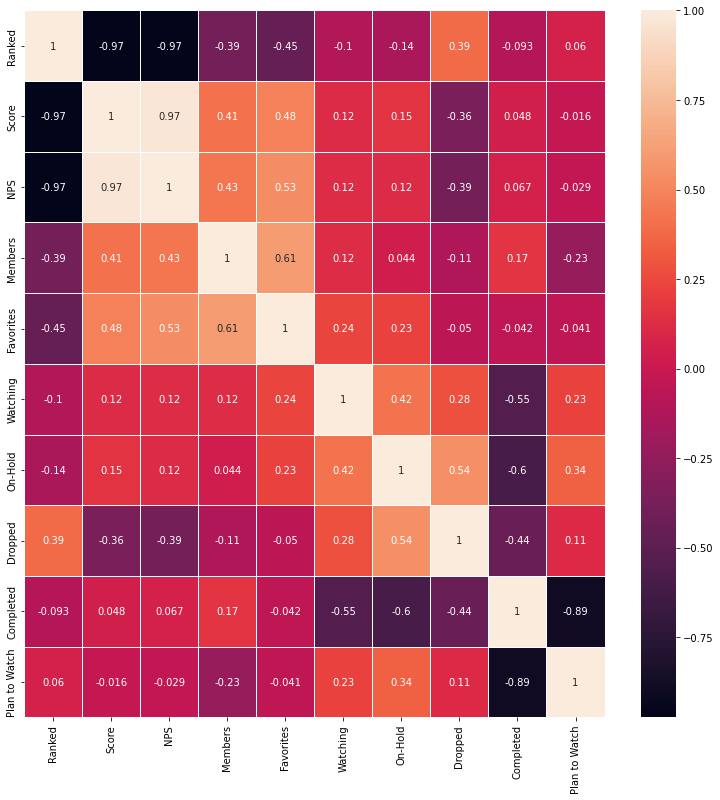

In [9]:
plt.subplots(figsize=(13,13))
sns.heatmap(norm_df.corr(),annot=True,linewidths = 1)
plt.show()

На карте корреляции видно, что "NPS", "Score", "Ranked" практически полностью коррелируются, что очевидно, так как они объясняют одну характеристику. Поэтому из них оставим только один признак: “NPS”. Также признак “completed” коррелирует с большим числом пользовательских откликов, так как является обратным к ним, поэтому его также уберем из модели для более наглядных рещультатов. Также очевидно, что “Watching” и “On-hold” имеют одну и ту же суть, поэтому эти признаки заметно коррелируют друг с другом и одинаково коррелируют с другими признаками, поэтому оставим из них признак “On-hold”.

In [10]:
norm_df = pd.DataFrame(data=sorted_[["NPS", "Members"]], index = sorted_.index.values)
user_info = [ "Favorites", "On-Hold", "Dropped", "Plan to Watch"]
norm_df["Members"] =norm_df["Members"].astype(int)

for user_i in user_info:
    norm_df[user_i] = sorted_[user_i]/sorted_["Members"]

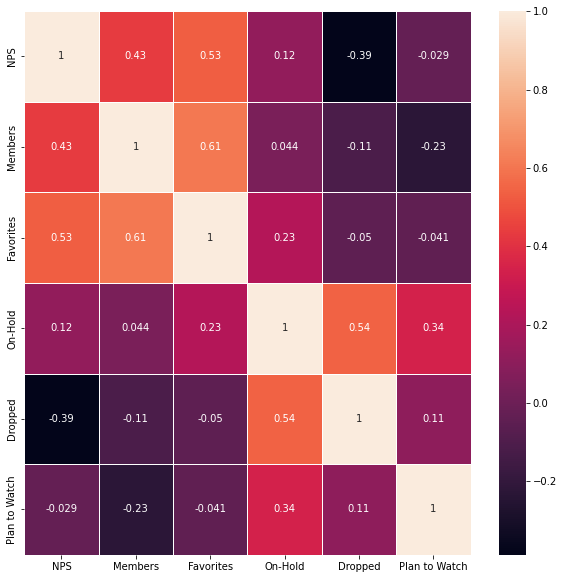

In [11]:
plt.subplots(figsize=(10,10))
sns.heatmap(norm_df.corr(),annot=True,linewidths = 1)
plt.show()

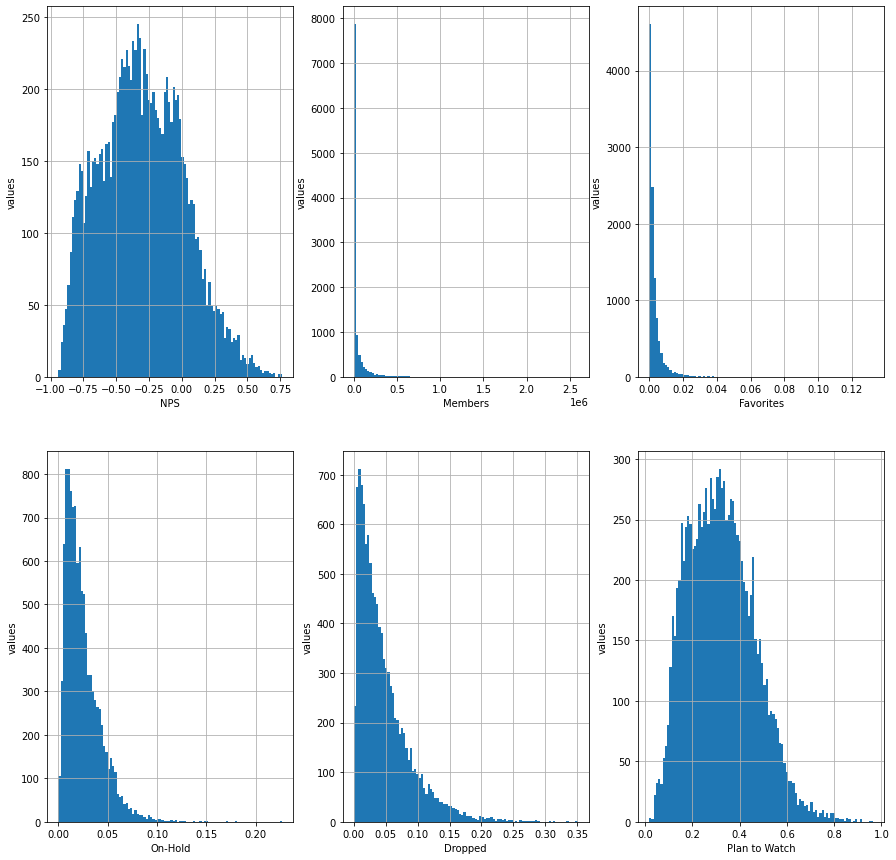

In [12]:
show_axisplt(norm_df)

Только NPS имеет близкое к нормальному распределение данных признаков. Очевидно, что признаки, которые были ранее поделены на "Members" ("Favorites", "On-Hold", "Dropped", "Plan to Watch") имеют логарифмическое распределение, но так как многие из этих признаков имеют значительное количество нулей, то вместо логарифма будет использоваться квадратный корень. А также сам members имеет логарифмическое распределение, но нулевые значения из него были исключены ранее, поэтому преобразуем его в логарифм.

Далее данные также стоит нормализовать, так как их значения измерения сильно разнятся. Нормализация данных была произведена при помощи функции библиотеки sklearn StandardScaler - этот метод масштабирования, при котором данные не масштабируются путем преобразования статистического распределения данных к стандартному распределению, при чем среднее будет равно нулю, а стандартное отклонение единице.


In [13]:
for user_i in user_info:
    norm_df[user_i] = norm_df[user_i]**(1/2)
    
norm_df["Members"] =np.log(norm_df["Members"])

scaler = preprocessing.StandardScaler()
norm_df = pd.DataFrame(scaler.fit_transform(norm_df), columns=norm_df.columns, index = norm_df.index.values)

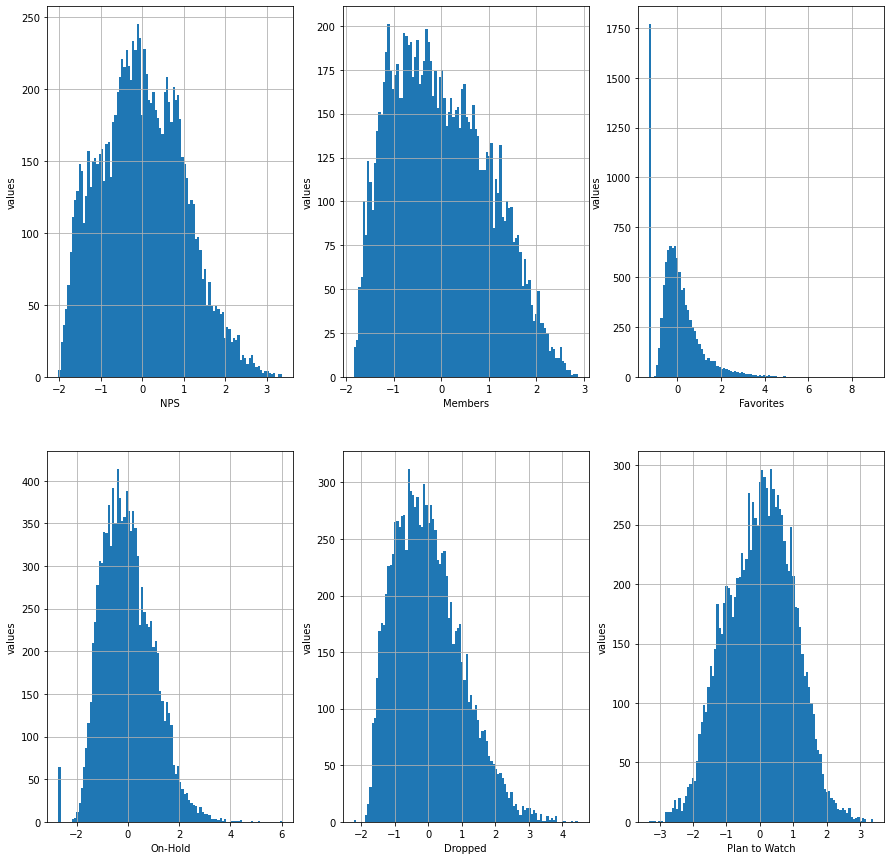

In [14]:
show_axisplt(norm_df)

На рисунках выше видно, что после всех преобразований все данные распределены в виде близком к нормальному, но у favorites много нулевых значений, что всё равно близко к новому среднему.

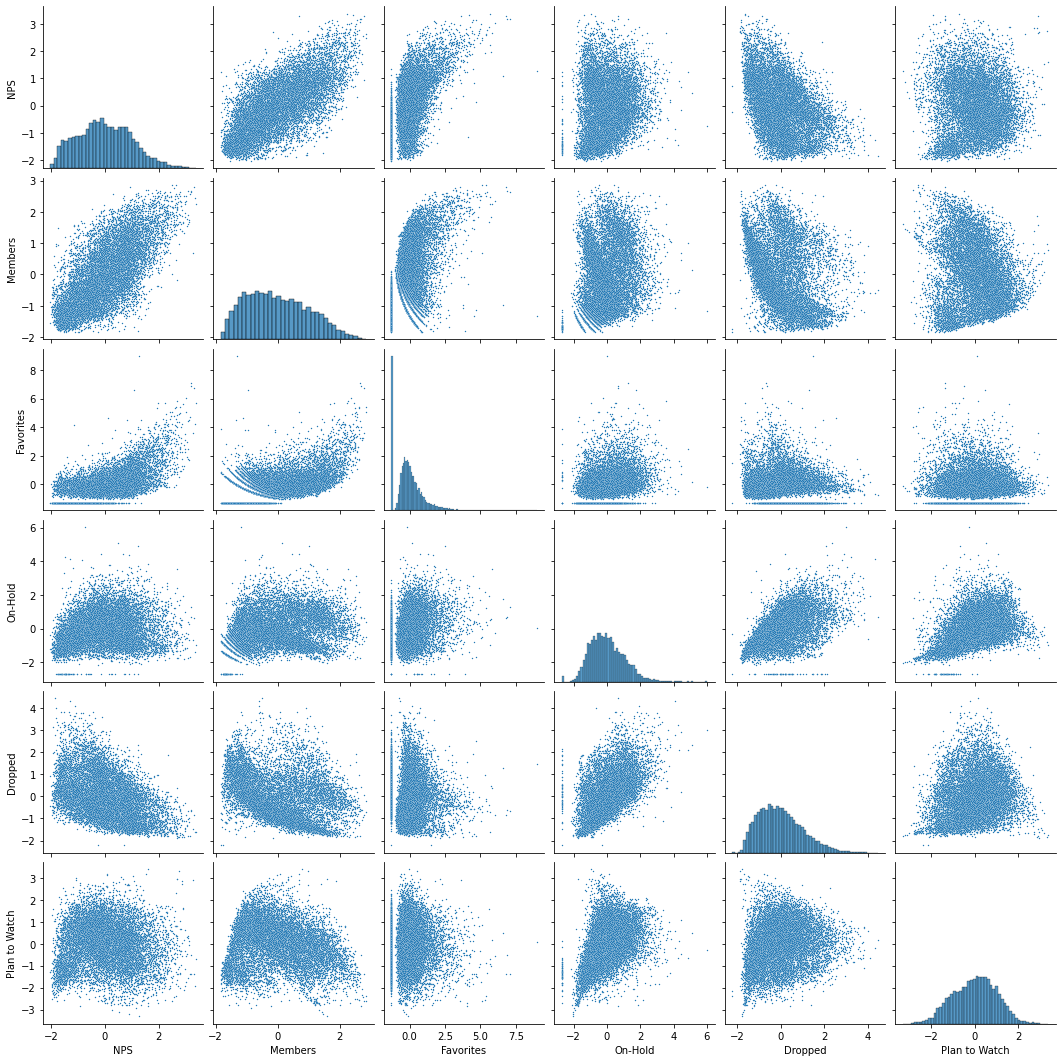

In [15]:
sns.pairplot(norm_df, height=2.5, plot_kws={"s": 2})

Таким образом, выбранными для дальнейшего исследования признаками являются Индекс потребительской лояльности ("NPS"), количество пользователей, добавивших аниме в свои группы просмотров("Members"), процент пользователей, добавивших аниме в любимые("Favorites"), процент пользователей, поставивших аниме на удержание("On-Hold"), процент пользователей, не досмотревших аниме("Dropped") и процент пользователей, планирующих посмотреть аниме ("Plan to Watch"). 

# DBSCAN
В рамках данной работы будет использоваться метод алгоритма кластеризации DBSCAN. DBSCAN (Density-based spatial clustering of applications with noise, плотностной алгоритм пространственной кластеризации с присутствием шума) – то есть алгоритм, который оперирует плотностью данных. Основная концепция алгоритма DBSCAN состоит в том, чтобы найти области высокой плотности, которые отделены друг от друга областями низкой плотности.

DBSCAN состоит из следующих шагов:
1.	Задаются значения ε-окрестности и MinPts. Случайным образом выбирается начальная или еще не просмотренная точка (объект). 
2.	Проверяется ε-окрестность точки: если окрестность содержит достаточно много (в смысле MinPts) точек, образуется кластер, в противном случае выбранная точка помечается как шум. 
3.	Если точка найдена как плотная точка кластера, то её ε-окрестность также является частью этого кластера. Следовательно, все точки, найденные в ε-окрестности плотной точки, добавляются к кластеру. Этот процесс продолжается, пока не будет найден связный по плотности кластер, то есть, пока не будут собраны все точки, плотно-достижимые из корневой.
4.	Выбирается новая не просмотренная точка. Повторяются этапы 2, 3.
5.	Процесс завершается, когда ни к одному кластеру не может быть добавлено ни одного нового объекта.


In [16]:
# DBSCAN(DB, distFunc, eps, minPts) {
#    C=0                                                  /* Счётчик кластеров */
#    for each point P in database DB {
#       if label(P) ≠ undefined then continue               /* Точка была просмотрена во внутреннем цикле */
#       Neighbors N=RangeQuery(DB, distFunc, P, eps)      /* Находим соседей */
#       if|N|< minPts then {                              /* Проверка плотности */
#          label(P)=Noise                                 /* Помечаем как шум */
#          continue
#       }
#       C=C + 1                                           /* следующая метка кластера */
#       label(P)=C                                        /* Помечаем начальную точку */
#       Seed set S=N \ {P}                                /* Соседи для расширения */
#       for each point Q in S {                             /* Обрабатываем каждую зачаточную точку */
#          if label(Q)=Noise then label(Q)=C            /* Заменяем метку Шум на Край */
#          if label(Q) ≠ undefined then continue            /* Была просмотрена */
#          label(Q)=C                                     /* Помечаем соседа */
#          Neighbors N=RangeQuery(DB, distFunc, Q, eps)   /* Находим соседей */
#          if|N|≥ minPts then {                           /* Проверяем плотность */
#             S=S ∪ N                                     /* Добавляем соседей в набор зачаточных точек */
#          }
#       }
#    }
# }

Не существует автоматического способа определения значения количество соседей (далее MinPts) для DBSCAN. В конечном счете, значение MinPts следует устанавливать, используя знание предметной области и знакомство с набором данных. Из исследований существуют следующие правила выбора значения MinPts:

Чем больше набор данных, тем больше должно быть значение MinPts.

Если набор данных более шумный, необходимо увеличивать значение MinPts.

Как правило, MinPts должно быть больше или равно размерности набора данных.

Если данные имеют более двух измерений, то MinPts = 2*dim, где dim - размерность набора данных (Сандер и др., 1998).
	
Таким образом, так как у меня 6 размерностей, то возьмем минимальное число MinPts = 12, а максимальное число количеству минимальных уникальных жанров, то есть 66 (жанр “Cars”).
    
После того, как определено значение MinPts, следует перейти к определению ε (Эпсилон). Для этого воспользуемся методом вычисления средних расстояний между каждой точкой и k ее ближайшими соседями, где k = выбранное значение MinPts. Затем средние k-расстояния наносятся в порядке возрастания на график k-расстояний. 


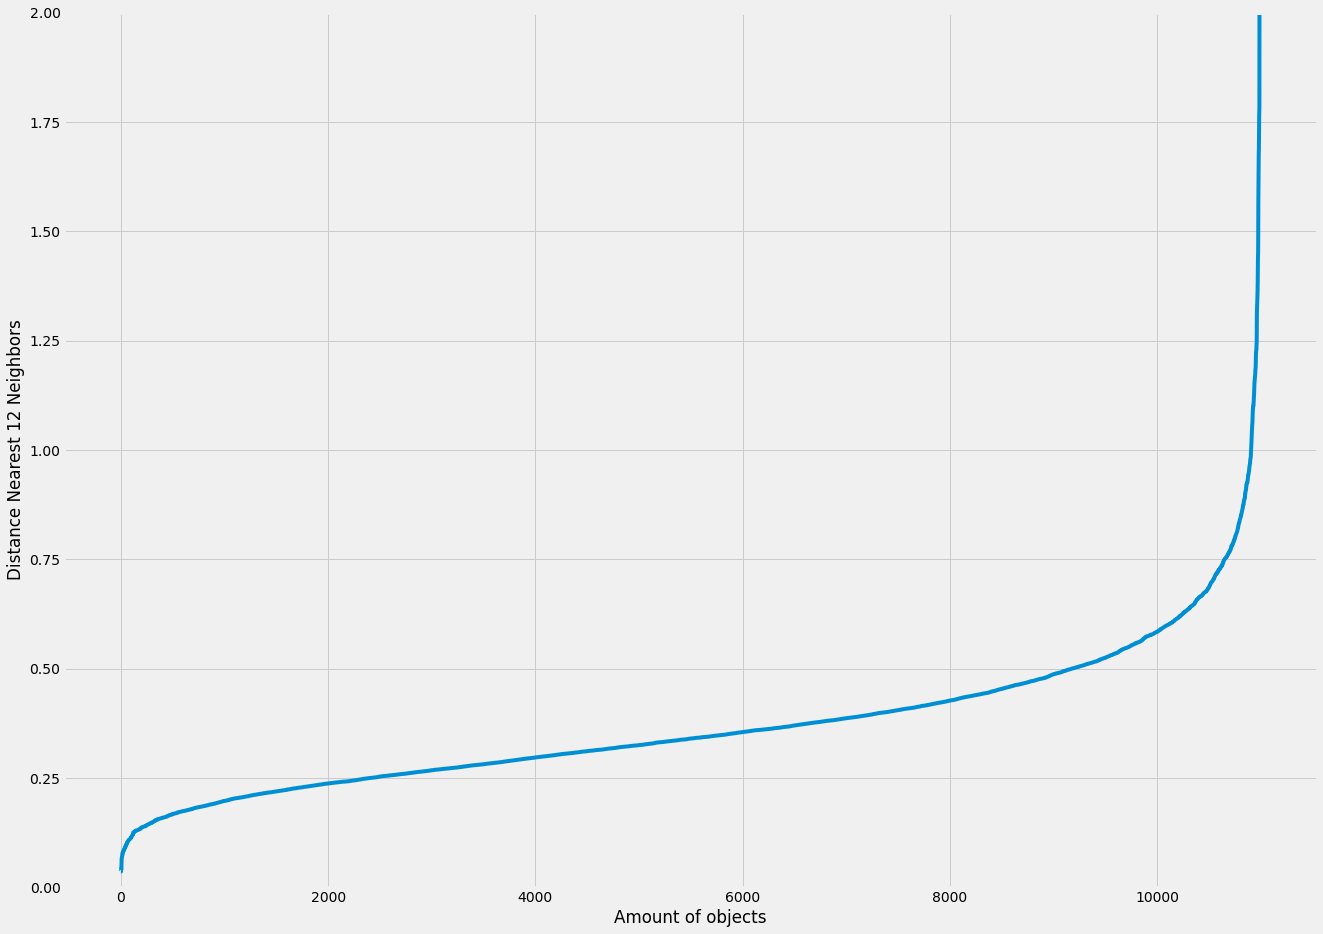

In [17]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,15))
elbow_dbscan(norm_df,0,2, 12)

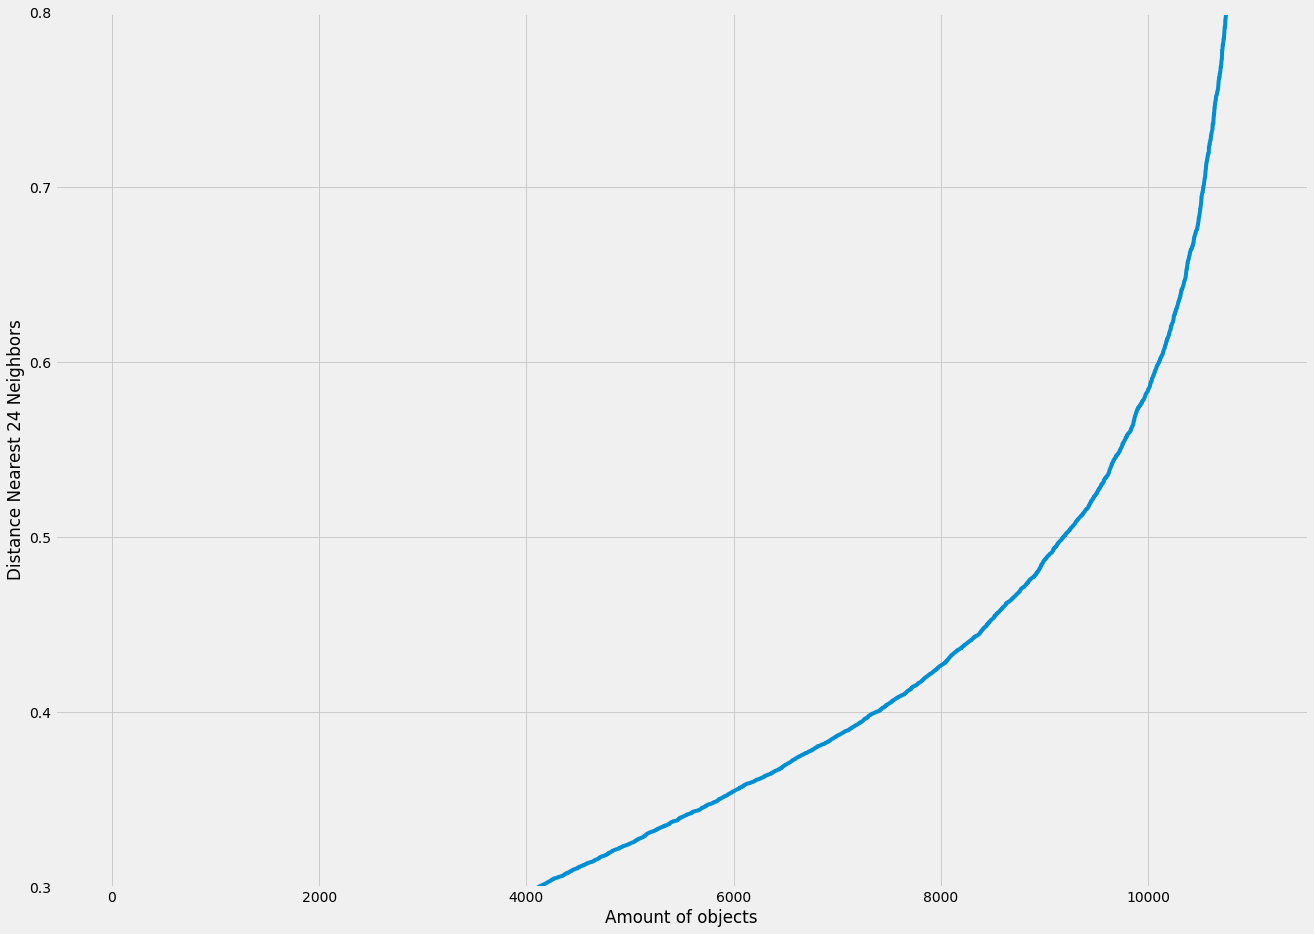

In [18]:
plt.figure(figsize=(20,15))
elbow_dbscan(norm_df,0.3,0.8, 24)

Оптимальное значение ε находится в точке максимальной кривизны (то есть там, где график имеет наибольший наклон) по графику для 50 ближайших соседей видно, что это точка располагается между 0.4 и 0.6. При увеличении графика и расчёта 24 ближайших соседей видно, что этот диапазон меняется не значительно.

Также построим график локтя для определения оптимального количества кластеров:

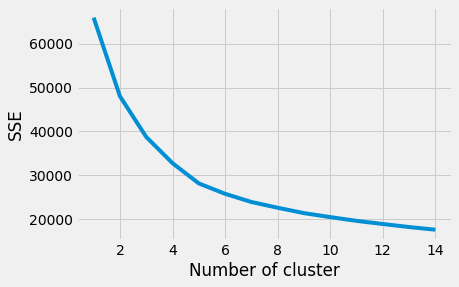

In [19]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(norm_df)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

24
.....................

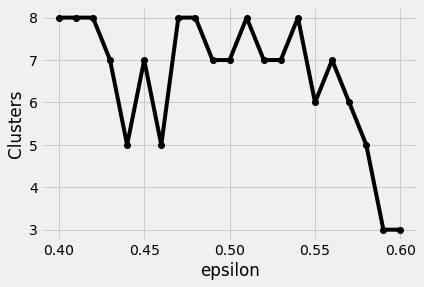

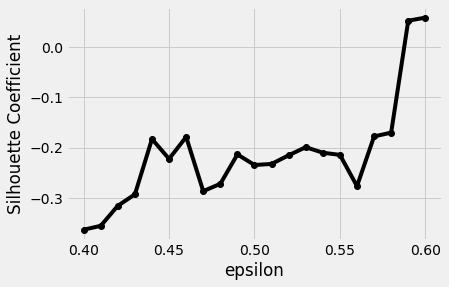

In [20]:
clusters_plots(norm_df, 24,24,1,0.4,0.61,0.01)

После множественного запуска данного метода было определено, что наибольшее значение Коэффициент силуэта при количестве кластеров близкое к точке выпрямления на графике локтя в полученном оптимальном диапазоне коэффициентов принимает при значении коэффициентов равном MinPts = 24 и ε = 0.54. 

In [21]:
# norm_df = norm_df.drop(['Clusters'], axis=1)
dbscan = DBSCAN(eps=0.54,
    min_samples=24,)
dbscan.fit(norm_df)

clustersL = dbscan.labels_.tolist()
# Enable for additional info

# print(len(set(clustersL)))
# print(max(clustersL,key=clustersL.count))
# print(Counter(clustersL).most_common(1)[0][1])

In [22]:
norm_df['Clusters'] = dbscan.labels_

В результате работы метода кластеризации было получено 7 кластеров, включая шумы: один большой кластер (0 – 3422 элемента), два кластера поменьше (1, 4 – 414, 671 элемент соответственно), и четыре ещё более маленьких кластера (2,3,5,6 – 19, 41, 74, 21) и достаточно много данных, помеченных, как шумы (6332 элемента), чего было сложно избежать из-за необходимости получения нескольких существенных кластеров (элементов больше 1 процента), из-за постоянной плотности данных по всему датасету и специфики алгоритма кластеризации.

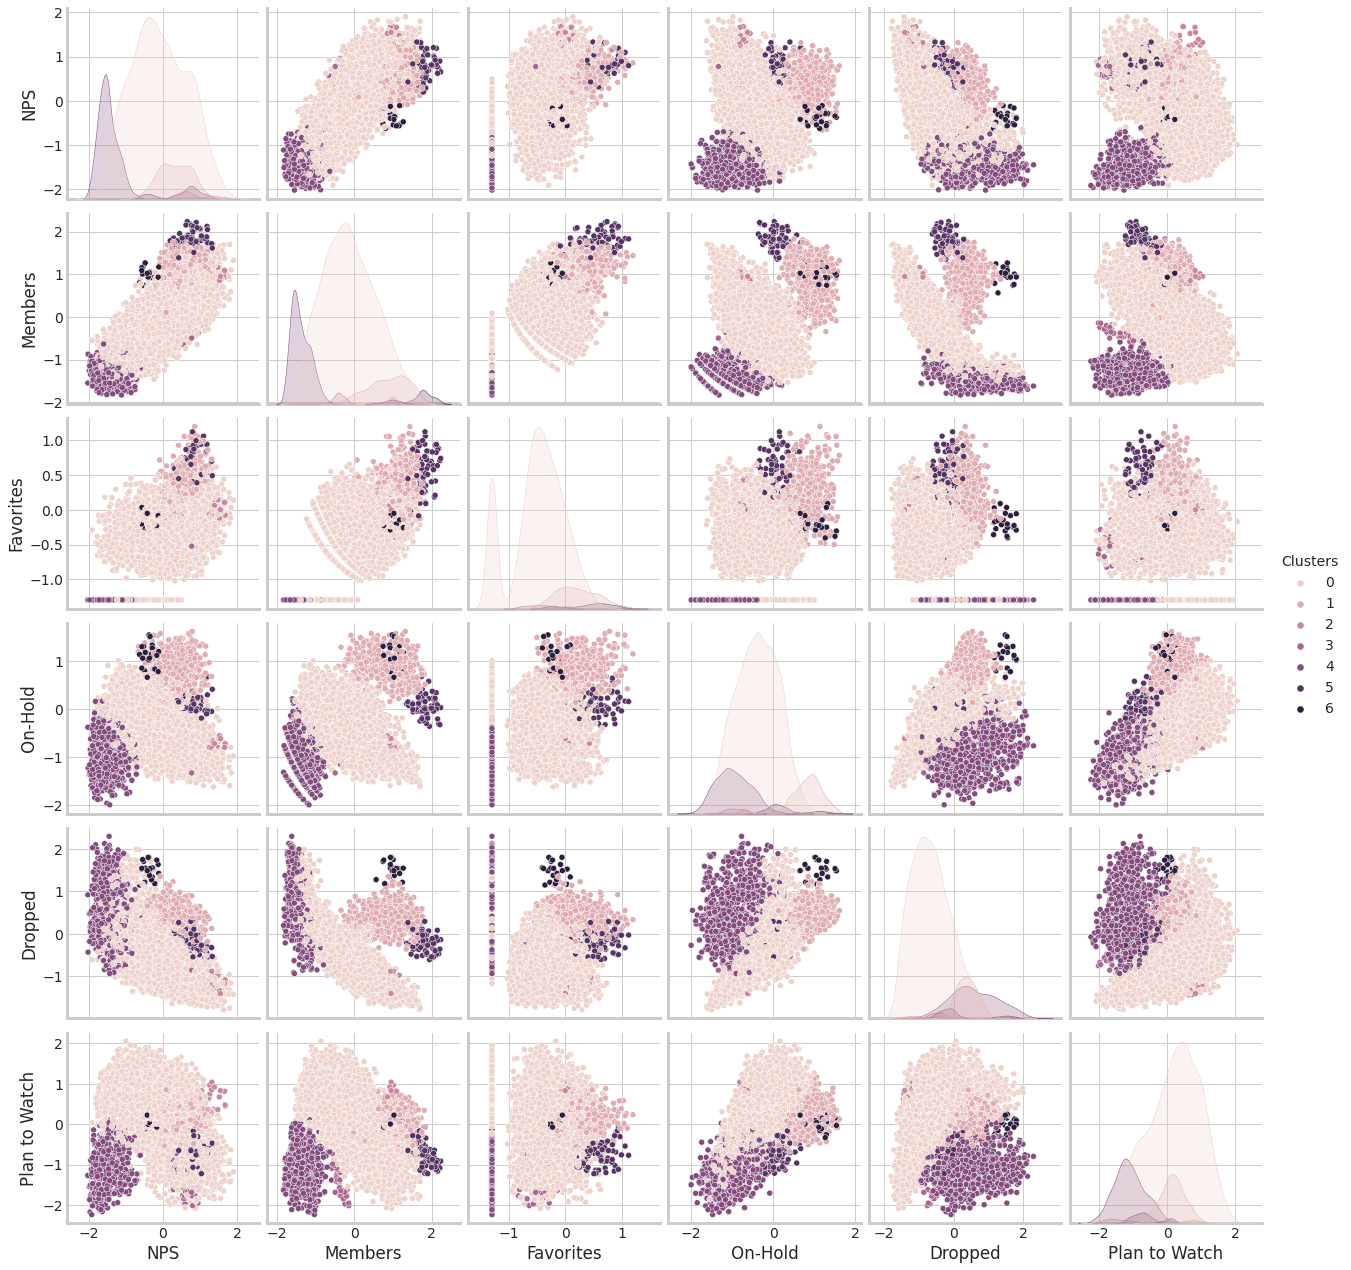

In [24]:
clean_df = norm_df[(norm_df["Clusters"] != -1)]
sns.set_style("whitegrid")
sns.pairplot(clean_df, hue = 'Clusters', height=3);
plt.show()

Как видно из диаграммы рассеяния (зависимостей между признаками), кластеры выделяются на визуально отличимые группы на каждом графике. Также сравнивания с диаграммами с изначальной диаграммы рассеяния видно, что большая часть зависимостей сохранилась, не смотря на отсутствие шумов. 

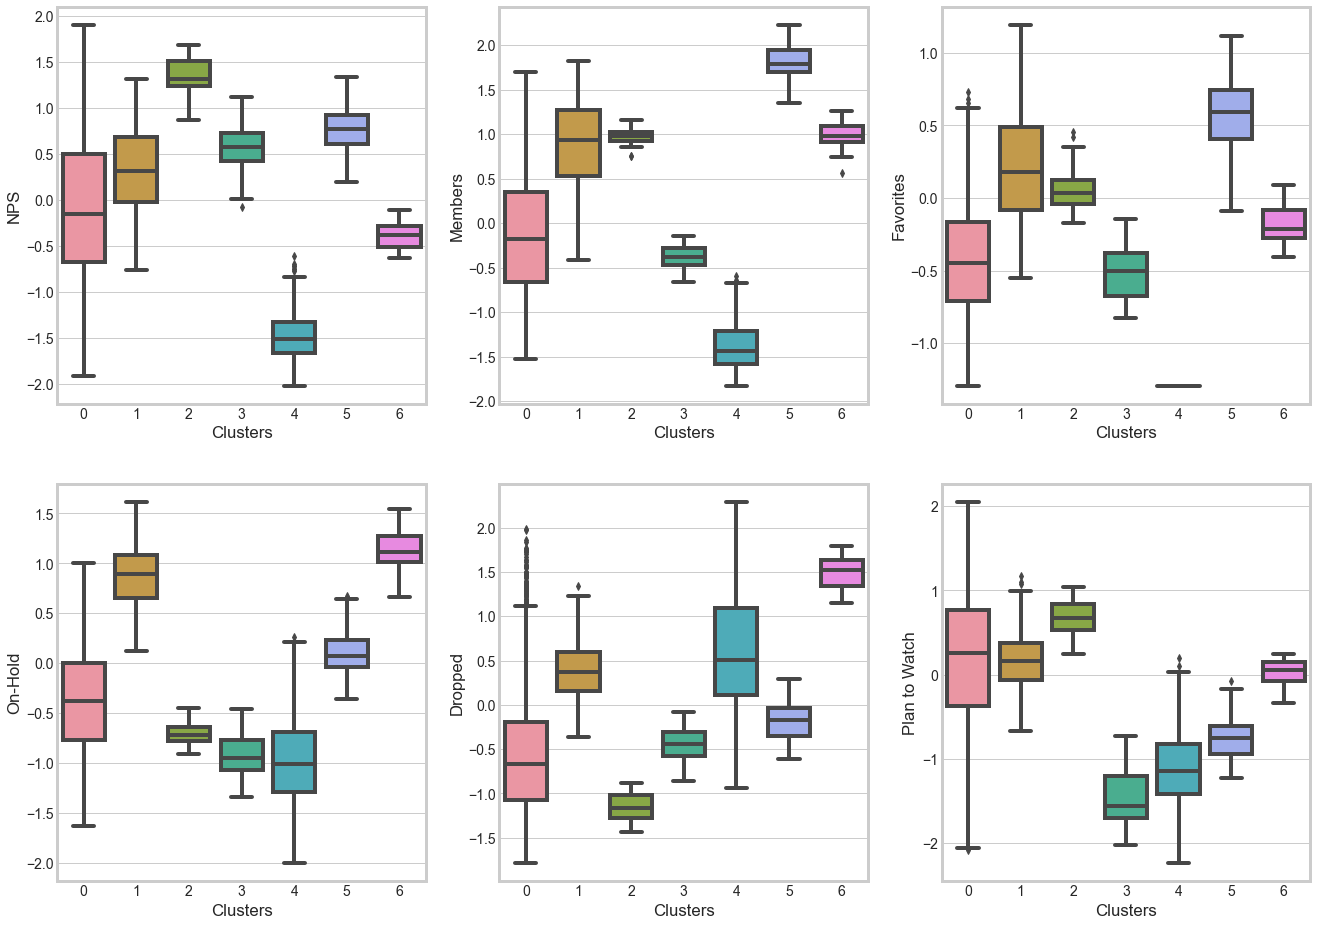

In [23]:
fig, axs = plt.subplots(2, 3, figsize=(20,15))
i = 0
for column in clean_df.columns.values:
    if column == "Clusters":
        break
    x, y =divmod(i, 3)
    axs[x,y].set_ylabel("values")
    axs[x,y].set_xlabel(column)
    sns.boxplot(ax=axs[x,y], x=clean_df['Clusters'],y=clean_df[column],data=clean_df)
    i += 1
plt.show()

Также уместно рассмотреть диаграмму размаха. Очевидно, что кластеры 4 и 6 - это самые не удачные аниме, потому что их значения NPS одни из самых наименьших, а Dropped одни из самых наибольших. Значения кластера 0 имеют наибольший разброс по всем параметрам, поэтому для него сложно сделать однозначные выводы. Кластер 3 является самым средним по всем показателям, но NPS у него выше среднего, а Plan to Watch ниже. Кластеры 1 и 5 самые популярные по количеству добавлений в любимое и довольно высоко по NPS. Самым лучшим, судя по NPS, Dropped и Plan to Watch является кластер 2.

Далее стоит делать выводы по кластерам 1(удачный), 4(не удачный), как по самым большим с небольшим разбросом и по кластеру 2, как по самому лучшему.

Следующим шагом объединим жанры и прочие начальные показатели в абсолютных значениях с номерами кластеров:

In [24]:
genres = pd.read_csv("./genres.csv")
# genres['Score'] = genres['Score']/10
animeNames = genres['Name']
genres.set_index('Name', inplace=True)
genres.drop(columns = ['Genres'], inplace = True)
genres.drop(columns = ['Score'], inplace = True)

In [25]:
genres["Clusters"] = norm_df[column]
for column in sorted_.columns.values:
    genres[column] = sorted_[column]
genres.drop(columns = ['Genres'], inplace = True)

In [26]:
new_df = sorted_.Genres.str.split(', ', expand=True).stack().value_counts().reset_index()
genresNames = new_df['index'].values
notgenresNames = [item for item in genres.columns.values if item not in genresNames]
print(notgenresNames)

['Clusters', 'Score', 'Episodes', 'Duration', 'Ranked', 'Popularity', 'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped', 'Plan to Watch', 'NPS']


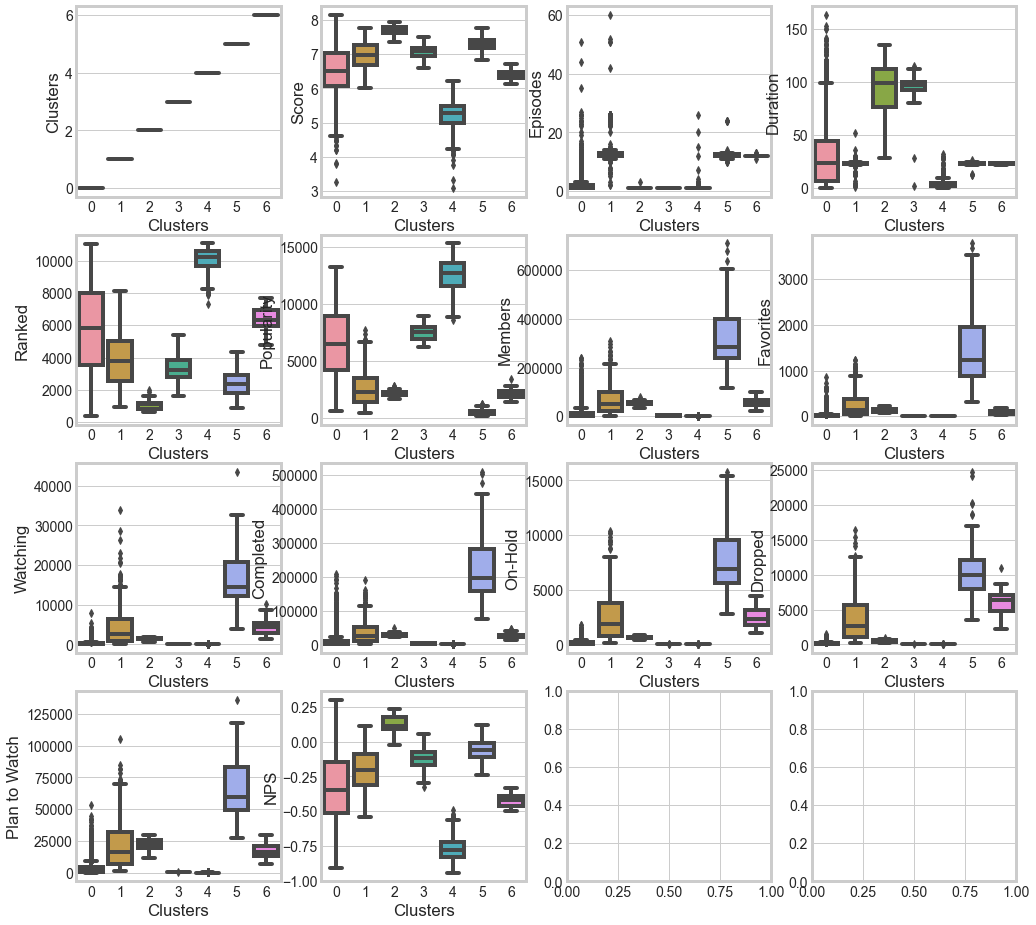

In [27]:
clean_df = genres[notgenresNames][(genres["Clusters"] != -1)]
clean_df["Episodes"] = clean_df["Episodes"].astype(int)
clean_df["Score"] = clean_df["Score"].astype(float)
clean_df["Ranked"] = clean_df["Ranked"].astype(float)

fig, axs = plt.subplots(4, 4, figsize=(15,15))
i = 0
for column in clean_df.columns.values:
    x, y = divmod(i, 4)
    axs[x,y].set_ylabel("values")
    axs[x,y].set_xlabel(column)    
    sns.boxplot(ax=axs[x,y], x=clean_df['Clusters'],y=clean_df[column],data=clean_df)
    i += 1
plt.show()

Параметры “Score” и “Ranked” отобразить корректно не удалось. Судя по абсолютным значениям “Members”, “Favorites” и прочих добавлений в группы: выводы о том, что кластеры 1 и 5 самые популярные был верен. Также стоит отметить, что аниме из кластеров 2 и 6 многие хотят посмотреть. Аниме из кластеров 2 и 3 в среднем длятся около 100 минут, из кластеров 1, 5 и 6 около 25 минут. А из кластера 4 около 10 минут. У кластеров 1, 5, 6 в среднем количество эпизодов около 12, а у остальных около единицы.

In [28]:
# Insert Column name to see closer

# plt.figure(figsize=(12,12))
# sns.boxplot(x=clean_df['Clusters'],y=clean_df["Episodes"],data=clean_df)

In [29]:
# Enable for hole corr map

# plt.subplots(figsize=(50,50))
# sns.heatmap(genres.corr(),annot=True,linewidths = 1)
# plt.show()

Далее выделим 5 наиболее часто встречающихся жанров для каждого кластера в среднем:

C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


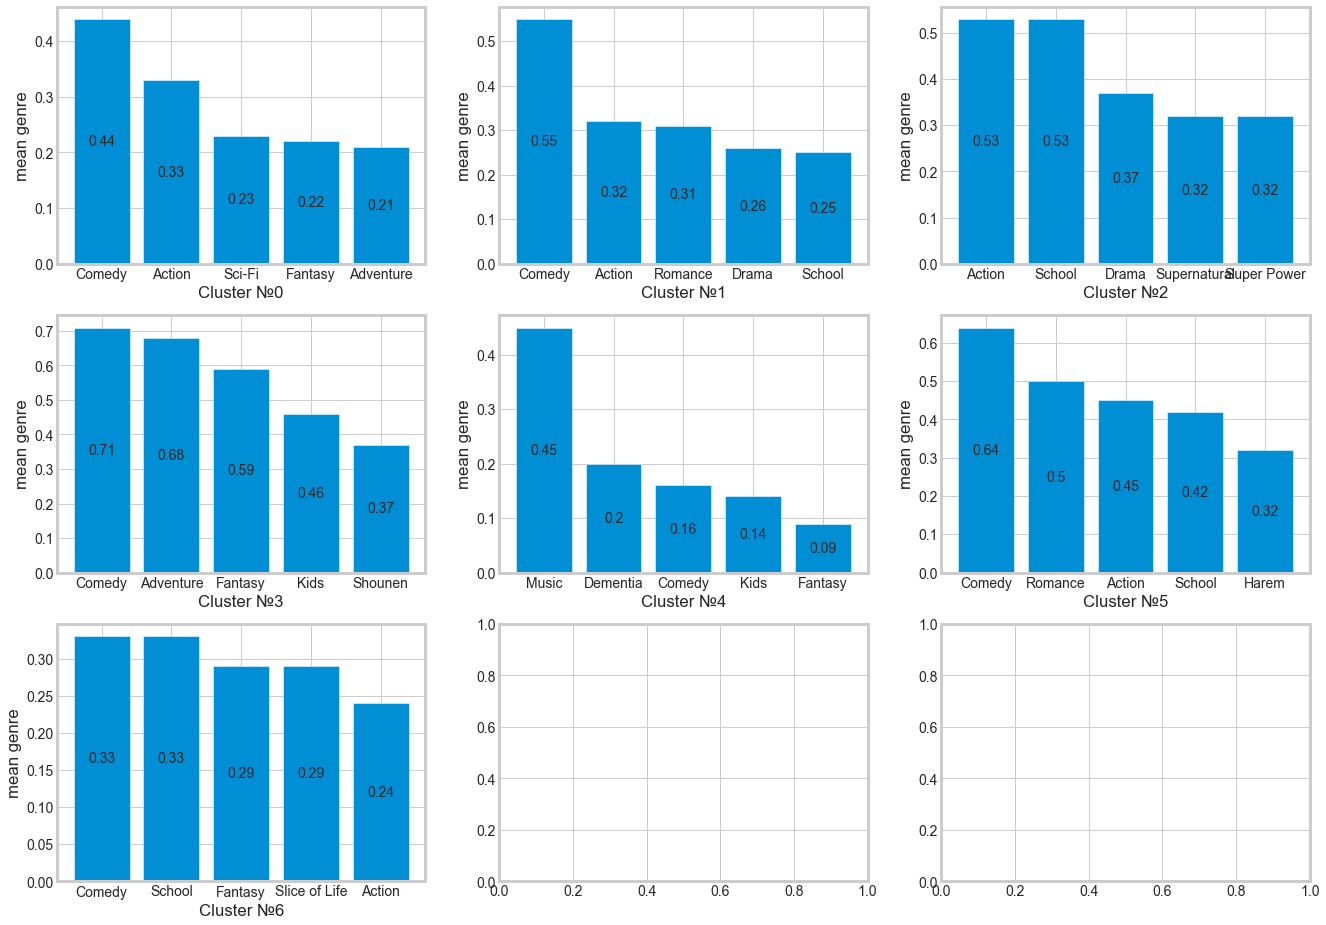

In [30]:
genres_wcluster = genres[genresNames]
genres_wcluster["Clusters"] = genres["Clusters"]
meansi = genres_wcluster.columns.values
means = []
amount = []
i = 0
N = 5
ind = np.arange(N)
fig, axs = plt.subplots(3, 3, figsize=(20,15))

for cluster in set(clustersL):
#     print(f"Cluster №{cluster}")
    desc = genres_wcluster[(genres_wcluster["Clusters"] == cluster)].describe()
    desc = desc.T
    amount.append(desc.loc["Clusters"]["count"])
    means.insert(i, desc["mean"].values)
    
    if cluster == -1:
        break
    x, y =divmod(i, 3)
    desc = desc.loc[genresNames]
    desc = desc.sort_values(by=['mean'], ascending=[False]).head(N)
    p = axs[x,y].bar(ind, np.round(desc["mean"].values, 2))
    axs[x,y].bar_label(p, label_type='center')
    axs[x,y].set_xticks(ind, labels=desc.index)
    axs[x,y].set_ylabel("mean genre")
    axs[x,y].set_xlabel(f"Cluster №{cluster}")
#     print( desc["mean"])
    i += 1
    
plt.show()
    
means = np.array(means)
means = means[:,:-1]
meansi = meansi[:-1]
amount = amount[:-1]

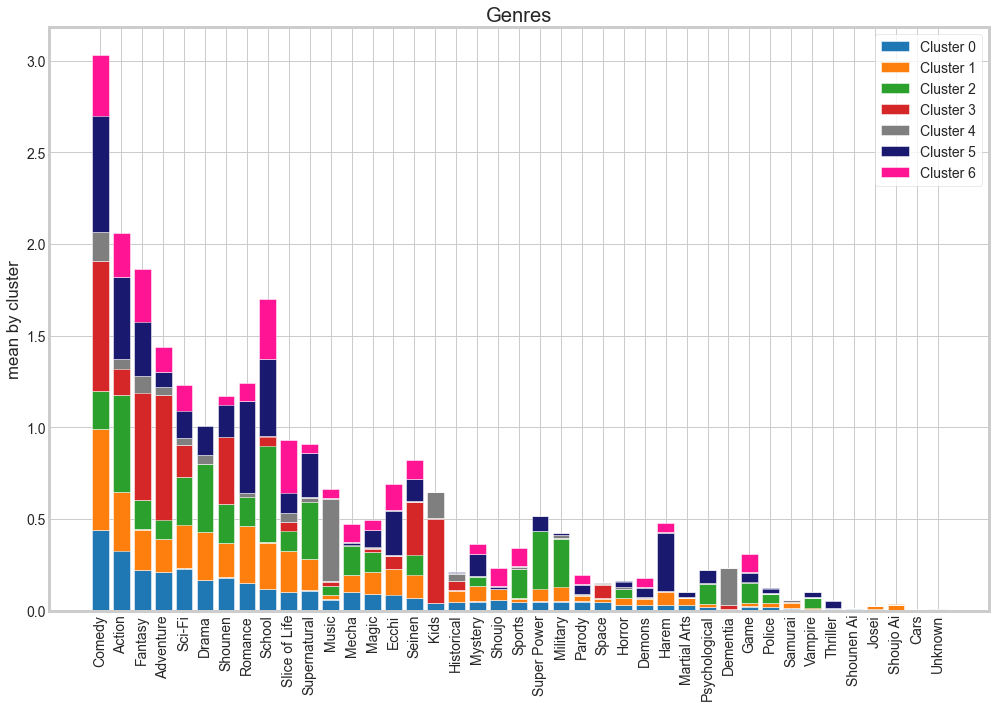

In [31]:
# plt.plot(amount)
# plt.show()
# cluster = 0
# for desc in means[:-1]:
#     print(f"Cluster №{cluster}")
#     plt.plot(desc[:-1])
#     plt.show()
#     cluster += 1
fig, ax = plt.subplots( figsize=(15,10))

N = len(means[0])
ind = np.arange(N)
width = 0.8
meansSum = 0
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:gray','midnightblue','deeppink']
for i in range(len(means) - 1):
    p = ax.bar(ind, np.round(means[i], 2), width, bottom= meansSum, label='Cluster '+ str(i), color=colors[i])
    meansSum += means[i]
#     ax.bar_label(p, label_type='center')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('mean by cluster')
ax.set_title('Genres')
ax.set_xticks(ind, labels=meansi, rotation=90)
ax.legend()

plt.show()

# Вывод
   Наибольший отклик у пользователей и наибольший рейтинг имеют аниме с количеством эпизодов около 12, с длительностью около 25 минут, жанров: Комедия, Романтика, Боевик(Экшен) и/или Школьное (кластеры 1 и 5), а также аниме с малым количеством эпизодов в среднем от 75 до 120 минут жанров: Школьное, Боевик(Экшен), Драма и/или с суперсилой (кластер 2).

Также не рекомендуется снимать аниме с малым количеством эпизодов с продолжительностью 10 минут и меньше жанров: Музыка, Деменция, Детское и Фантастика (кластер 4).

In [32]:
# import hdbscan
# hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
#     gen_min_span_tree=True, leaf_size=40,
#     metric='euclidean', min_cluster_size=60, min_samples=None, p=None)
# clusterer = hdbscan.HDBSCAN(min_cluster_size=60, gen_min_span_tree=True)
# clusterer.fit(norm_df)
# clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
#                                       edge_alpha=0.3,
#                                       node_size=10,
#                                       edge_linewidth=1)

In [33]:
# norm_df[(norm_df["Clusters"] != -1)&(norm_df["Clusters"] != 0)]

# for i in set(norm_df["Clusters"].unique()):
#     print(i)
#     print(norm_df[(norm_df["Clusters"] == i)].describe())

In [34]:
# genres[notgenresNames].loc["Kimi ni Todoke"]

In [35]:
# clean_df[(clean_df['Clusters']==6)]

Набор данных (anime.csv) содержит 17.562 различных аниме со следующими признаками: 
1.	Name: Название аниме. (например, Cowboy Bebop)
2.	Score: средний рейтинг. (например, 8.78)
3.	Genres: разделенный запятыми список жанров аниме. (например, Action, Adventure, Comedy, Drama, Sci-Fi, Space)
4.	English name: Название аниме на английском. (например, Cowboy Bebop)
5.	Japanese name: Название аниме на японском. (например, カウボーイビバップ)
6.	Episodes': number of chapters. (например, 26)
7.	Aired: дата первого показа. (например, Apr 3, 1998 to Apr 24, 1999)
8.	Premiered: дата выхода. (например, Spring 1998)
9.	Producers: разделенный запятыми список  продюсеров (например, Bandai Visual)
10.	Licensors: разделенный запятыми список  лицензоров (например, Funimation, Bandai Entertainment)
11.	Studios: разделенный запятыми список студий (например, Sunrise)
12.	Source: Источник идеи. (например, Original)
13.	Duration: Длина одного эпизода (e.g 24 min. per ep.)
14.	Rating: возрастной рейтинг (например, R - 17+ (violence & profanity))
15.	Ranked: Позиция в рейтинге. (например, 28)
16.	Popularity позиция по количеству пользователей, добавивших аниме в свой список. (например, 39)
17.	Members: количество пользователей, которые добавили аниме в свои группы. (например, 1251960)
18.	Favorites: количество пользователей, которые добавили аниме в "favorites". (например, 61971)
19.	Watching: количество пользователей, которые смотрят аниме. (например, 105808)
20.	Completed: количество пользователей, которые закончили смотреть аниме. (например, 718161)
21.	On-Hold: количество пользователей, которые добавили аниме на удержание. (например, 71513)
22.	Dropped: количество пользователей, которые не до смотрели аниме. (например, 26678)
23.	Plan to Watch': количество пользователей, которые планируют досмотреть аниме. (например, 329800)
24.	Score-10': количество пользователей, которые дали оценку 10. (например, 229170)
25.	Score-9': количество пользователей, которые дали оценку 9. (например, 182126)
26.	Score-8': количество пользователей, которые дали оценку 8. (например, 131625)
27.	Score-7': количество пользователей, которые дали оценку 7. (например, 62330)
28.	Score-6': количество пользователей, которые дали оценку 6. (например, 20688)
29.	Score-5': количество пользователей, которые дали оценку 5. (например, 8904)
30.	Score-4': количество пользователей, которые дали оценку 4. (например, 3184)
31.	Score-3': количество пользователей, которые дали оценку 3. (например, 1357)
32.	Score-2': количество пользователей, которые дали оценку 2. (например, 741)
33.	Score-1': количество пользователей, которые дали оценку 1. (например, 1580)
